# 1.1.2: Найти НОД числа 8 и заданного 10-значного без математических операций

Проверяем делится ли число на заданную степень 2

In [2]:
def IsDivByPow2(num : int, powof2 : int) -> bool:
    print(f"Проверяем делится ли {num} на {2**powof2}")
    num = bin(int(num))
    print(f"Двоичное представление числа: {num}")
    check = num[-powof2:]
    print(f"Нужное окончание числа: {check}")
    if check == '0'*powof2: return True
    return False


Находим НОД - проверяем все делители 8

In [3]:
def GCDof8and10n(num : int) -> int:
    for pw in range(3, 0, -1):
        if IsDivByPow2(num, pw): return 2**pw
    return 1

In [4]:
num = input("Введите 10-значное число: ")
GCD = GCDof8and10n(int(num))
print("============================")
print(f"НОД чисел {num} и 8: {GCD}")

Введите 10-значное число:  16


Проверяем делится ли 16 на 8
Двоичное представление числа: 0b10000
Нужное окончание числа: 000
НОД чисел 16 и 8: 8



LГLГLГLГLГLГLГLГLГLГLГLГLГLГLГLГLГLГLГLГLГLГLГLГLГLГLГLГLГLГLГLГLГLГLГLГLГLГ


# 1.2.1: Создать произвольный двухуровневый список и выбрать из него числа complex

In [2]:
import random
def GenerateRandomN():
    # Определяем тип числа
    ntype = random.randint(0, 2)
    # Диапазоны по сути не важны, важен только тип
    match ntype:
        # int
        case 0: n = random.randint(-100, 100)
        # float
        case 1: n = random.random() + random.randint(-100, 100)
        # complex
        case 2: n = complex(random.randint(-100, 100), random.randint(-100, 100))
    return n

def GenerateRandMatrix(cols : int, rows : int = 2) -> list:
    # Создаём список
    mx = []
    for i in range(rows):
        l = []
        for j in range(cols):
            l.append(GenerateRandomN())
        mx.append(l)
    return mx

def PrintMatrix(matrix : list) -> None:
    for l in matrix:
        print(l)

Создаём случайный двухуровневый список

In [3]:
MATRIX = GenerateRandMatrix(8)
PrintMatrix(MATRIX)

[(-89-72j), (87+68j), -18, -46.306863574717866, (20-53j), -25, 76.43803177058778, -36]
[-44.812260903893275, (-87+51j), -7.586914668218104, -68, -18.042329204210777, (-19-4j), -81, 100]


Находим все комплексные числа и упаковываем в tuple

In [4]:
def ExtractComplex(matrix : list) -> tuple:
    tup = []
    for l in matrix:
        for n in l:
            if isinstance(n, complex): tup.append(n)
    return tuple(tup)
print( ExtractComplex(MATRIX) )

((-89-72j), (87+68j), (20-53j), (-87+51j), (-19-4j))



LГLГLГLГLГLГLГLГLГLГLГLГLГLГLГLГLГLГLГLГLГLГLГLГLГLГLГLГLГLГLГLГLГLГLГLГLГLГ


# 1.2.2: 100 первых элементов последовательности частичных сумм ряда Фибоначчи
> Ряд Фибоначчи:      1 1 2 3 5  8 13 ...
> Ряд частичных сумм: 0 1 2 4 7 12 20 ...

In [18]:
def GenerateFibonacciSumsList(maxi : int = 100) -> list:
    if maxi <= 0:
        print("Запрошена неверная длина!")
        return None
    fibolist = [1, 1] # Числа Фибоначчи
    sums = [0, 1, 2]      # Ряд частичных сумм
    # Если считать ничего не надо
    if maxi <= 3: return sums[:maxi]
    # Итерируем со второго элемента
    for i in range(1, maxi):
        if i == 0: continue
        next = fibolist[i-1] + fibolist[i]
        fibolist.append(next)
        sums.append(sums[-1] + next)
        if len(sums) >= maxi: break
    return sums

In [20]:
print( GenerateFibonacciSumsList() )

[0, 1, 2, 4, 7, 12, 20, 33, 54, 88, 143, 232, 376, 609, 986, 1596, 2583, 4180, 6764, 10945, 17710, 28656, 46367, 75024, 121392, 196417, 317810, 514228, 832039, 1346268, 2178308, 3524577, 5702886, 9227464, 14930351, 24157816, 39088168, 63245985, 102334154, 165580140, 267914295, 433494436, 701408732, 1134903169, 1836311902, 2971215072, 4807526975, 7778742048, 12586269024, 20365011073, 32951280098, 53316291172, 86267571271, 139583862444, 225851433716, 365435296161, 591286729878, 956722026040, 1548008755919, 2504730781960, 4052739537880, 6557470319841, 10610209857722, 17167680177564, 27777890035287, 44945570212852, 72723460248140, 117669030460993, 190392490709134, 308061521170128, 498454011879263, 806515533049392, 1304969544928656, 2111485077978049, 3416454622906706, 5527939700884756, 8944394323791463, 14472334024676220, 23416728348467684, 37889062373143905, 61305790721611590, 99194853094755496, 160500643816367087, 259695496911122584, 420196140727489672, 679891637638612257, 110008777836610

А вообще, так как чисел всего 100, нам не обязательно каждый раз вычислять список. Можно попробовать хранить его в памяти)

In [21]:
def LazyFibonacciSumsList(maxi : int = 100) -> list:
    if maxi <= 0:
        print("Запрошена неверная длина!")
        return None
    knownSums = [0, 1, 2, 4, 7, 12, 20, 33, 54, 88, 143, 232, 376, 609, 986, 1596, 2583, 4180, 6764, 10945, 17710, 28656, 46367, 75024, 121392, 196417, 317810, 514228, 832039, 1346268, 2178308, 3524577, 5702886, 9227464, 14930351, 24157816, 39088168, 63245985, 102334154, 165580140, 267914295, 433494436, 701408732, 1134903169, 1836311902, 2971215072, 4807526975, 7778742048, 12586269024, 20365011073, 32951280098, 53316291172, 86267571271, 139583862444, 225851433716, 365435296161, 591286729878, 956722026040, 1548008755919, 2504730781960, 4052739537880, 6557470319841, 10610209857722, 17167680177564, 27777890035287, 44945570212852, 72723460248140, 117669030460993, 190392490709134, 308061521170128, 498454011879263, 806515533049392, 1304969544928656, 2111485077978049, 3416454622906706, 5527939700884756, 8944394323791463, 14472334024676220, 23416728348467684, 37889062373143905, 61305790721611590, 99194853094755496, 160500643816367087, 259695496911122584, 420196140727489672, 679891637638612257, 1100087778366101930, 1779979416004714188, 2880067194370816119, 4660046610375530308, 7540113804746346428, 12200160415121876737, 19740274219868223166, 31940434634990099904, 51680708854858323071, 83621143489848422976, 135301852344706746048, 218922995834555169025, 354224848179261915074, 573147844013817084100, 927372692193078999175, 1500520536206896083276]
    if maxi <= 100: return knownSums[:maxi]
    return FibonacciSumsList(maxi)

In [22]:
print( LazyFibonacciSumsList() )

[0, 1, 2, 4, 7, 12, 20, 33, 54, 88, 143, 232, 376, 609, 986, 1596, 2583, 4180, 6764, 10945, 17710, 28656, 46367, 75024, 121392, 196417, 317810, 514228, 832039, 1346268, 2178308, 3524577, 5702886, 9227464, 14930351, 24157816, 39088168, 63245985, 102334154, 165580140, 267914295, 433494436, 701408732, 1134903169, 1836311902, 2971215072, 4807526975, 7778742048, 12586269024, 20365011073, 32951280098, 53316291172, 86267571271, 139583862444, 225851433716, 365435296161, 591286729878, 956722026040, 1548008755919, 2504730781960, 4052739537880, 6557470319841, 10610209857722, 17167680177564, 27777890035287, 44945570212852, 72723460248140, 117669030460993, 190392490709134, 308061521170128, 498454011879263, 806515533049392, 1304969544928656, 2111485077978049, 3416454622906706, 5527939700884756, 8944394323791463, 14472334024676220, 23416728348467684, 37889062373143905, 61305790721611590, 99194853094755496, 160500643816367087, 259695496911122584, 420196140727489672, 679891637638612257, 110008777836610


LГLГLГLГLГLГLГLГLГLГLГLГLГLГLГLГLГLГLГLГLГLГLГLГLГLГLГLГLГLГLГLГLГLГLГLГLГLГ


# 1.3.1: Ищем нули функции на интервале

In [31]:
# Пользовательская функция
def F(x : float) -> float:
    return x**2-1.2

# Поиск нулей
def FindZeros(f, start : float, end : float) -> list:
    zeros = []
    # Рекурсивная дихотомия
    def Dihotomy(dstart : float, dend : float, n = 1, eps = 1e-12) -> None:
        n *= 2 # количество разбиений
        centerX = (dstart + dend) / 2
        centerY = f(centerX)
        # print(f"Проверяем точку {centerX}:{centerY}")

        # Проверяем подходит ли текущая точка 
        if abs(centerY) <= 1e-8: # можно уменьшить "привередливость", 
                                  # но тогда выскочат лишние нули (другие ветки рекурсии найдут тот же ноль)
            #print(f"Точка {centerX} является нулём")
            zeros.append(centerX)
            return
        if abs(dend - dstart) <= eps: 
            #print("Интервал слишком маленький, завершаем эту ветку")
            return
        # Вызываем эту же функцию на половине, где знаки разные
        if f(dstart)*centerY < 0: Dihotomy(dstart, centerX, n)
        if centerY*f(dend) < 0: Dihotomy(centerX, dend, n)
        ## Вызываем всегда, потому что нуль может спрятаться
        #Dihotomy(dstart, centerX, n)
        #Dihotomy(centerX, dend, n)
    # Вызываем дихотомию для малых интервалов
    # (так как 0 у нас не единственный)
    h = (end - start) / 100
    curX = start
    # очень разочаровался узнав что нету встроенного способа 
    # итерации с вещественными числами, или хотя бы for в стиле C
    while curX <= end-h: 
        Dihotomy(curX, curX+h)
        curX += h
    return zeros

In [32]:
from math import sin # для тестов
print( FindZeros(F, start = -2.0, end = 2.0) )

[-1.0954451179504385, 1.0954451179504407]



LГLГLГLГLГLГLГLГLГLГLГLГLГLГLГLГLГLГLГLГLГLГLГLГLГLГLГLГLГLГLГLГLГLГLГLГLГLГ


# 1.3.3: Посчитать частотность всех слов в большой строке
Как основу возьмём [часть текста правил ДнД для класса волшебник](https://dnd.su/class/105-wizard/)

In [105]:
TEXT : str = """Волшебники — адепты высшей магии, объединяющиеся по типу своих заклинаний. Опираясь на тонкие плетения магии, 
пронизывающей вселенную, волшебники способны создавать заклинания взрывного огня, искрящихся молний, тонкого обмана и грубого 
контроля над сознанием. Их магия вызывает чудовищ с других планов бытия, предсказывает будущее и обращает поверженных врагов в зомби. 
Их самые могущественные заклинания могут превращать одно вещество в другое, вызывать метеориты с небес и открывать порталы в другие миры. 

Дикая и загадочная, разнообразная по форме и функциям, магия привлекает учеников, которые стремятся достичь мастерства в её тайнах. 
Некоторые хотят уподобиться богам, изменять саму реальность. И хотя для накладывания обычного заклинания требуется лишь 
произношение нескольких странных слов, совершение пары мимолётных жестов, а иногда щепотка или комок экзотических материалов, 
эти поверхностные проявления не могут показать опыт, достигнутый долгими часами ученичества и бессчётными часами исследований. 
Волшебники живут и умирают со своими заклинаниями. Всё остальное вторично. Они учат новые заклинания, экспериментируя и становясь опытнее. 
Они также могут узнать их от других волшебников, из древних томов или свитков, и от древних существ (таких как феи), 
которые погружены в магию.

Жизнь волшебников редко бывает обыденной. Наиболее близки к простой жизни, вероятно, те из волшебников, которые 
работают знатоками или лекторами в библиотеке университета, обучая других секретам мультивселенной. Другие волшебники предлагают 
свои услуги в качестве прорицателей, служат в вооружённых силах, или проводят жизнь в преступлениях и стремлении к власти.
Но соблазн знаний и силы зовёт даже самых обделённых смелостью волшебников из безопасности их библиотек и лабораторий в разрушенные руины
и потерянные города. Большинство волшебников считает, что их коллеги из древних цивилизаций знали секреты магии, 
которые были потеряны навек, и открывшие эти секреты смогут владеть силами, недоступными в нынешнем веке.

При создании персонажа волшебника в его истории обязательно должно быть некое выдающееся событие. Как ваш персонаж впервые 
встретился с магией? Как он открыл свою предрасположенность к ней? Владелец ли он природного таланта или же достиг всего усердной учёбой и 
постоянной практикой? Или же произошла неожиданная встреча с магическим существом или древней книгой, что могло обучить его основам 
магического искусства? Что привлекло вас к жизни в обучении? Сподвиг ли вас на большее вкус первого обретённого магического знания? 
Постигли ли вы слова тайного хранилища знаний, еще не разграбленного другими волшебниками? Возможно, вы просто желаете противопоставить 
обретённые магические навыки опасностям для проверки своих сил.

Вы можете быстро создать волшебника, следуя этим рекомендациям. Во-первых, у вашего Интеллекта должно быть наивысшее значение. 
Следующим по величине должно быть значение Телосложения или Ловкости. Если вы планируете присоединиться к школе Очарования, 
сделайте вторым по величине значение Харизмы. Во-вторых, выберите предысторию «мудрец». В-третьих, выберите заговоры 
волшебная рука [mage hand], луч холода [ray of frost] и свет [light], а также заклинания 1 уровня для вашей книги заклинаний: 
волшебная стрела [magic missile], доспехи мага [mage armor], огненные ладони [burning hands], очарование личности [charm person], 
падение пёрышком [feather fall] и усыпление [sleep].
"""
TEXT = str(TEXT).replace('\n', ' ')
#print(TEXT)

In [49]:
# Устанавливаем nltk (зависит от системы)
# pip install nltk --break-system-packages

In [90]:
import nltk
# Токенизация
nltk.download('punkt')
nltk.download('punkt_tab')
# Удаление "стоп-слов" (предлоги и прочее неважное)
nltk.download("stopwords")

# Токенизация
from nltk.tokenize import word_tokenize
# Стоп-слова
from nltk.corpus import stopwords
# Стемминг (приведение однокоренных слов)
from nltk.stem.snowball import SnowballStemmer
# Лемматизация (более сложное уменьшение разнообразия)
# [x] для русского языка нет отдельного пакета, используется предыдущий
# Регулярные выражения
import re

[nltk_data] Downloading package punkt to /home/lev/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /home/lev/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /home/lev/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [124]:
# Определяем стеммер
stemmer = SnowballStemmer("russian")
# Получаем список стоп-слов
stop_words = set(stopwords.words("russian"))
# Список не очень большой, так что дополняем некоторые слова
stop_words.update(['или', 'эти', 'ваш'])
# Фильтруем токены
preparedTEXT = re.split(r"[, .—?!\n\t\[\]\(\)1-9]+", TEXT)
countedWords : {str: int} = {} # для подсчёта слов
fullWords : {str: str} = {} # сохраняются корни, поэтому отдельно будем хранить полноценные слова
for word in preparedTEXT:
    # print(f"> {word}")
    word = word.lower()
    clearedWord = stemmer.stem(word)
    if clearedWord in stop_words or word in stop_words: continue
    if not clearedWord in countedWords: countedWords[clearedWord] = 0
    countedWords[clearedWord] += 1
    # Сохраняем полное слово
    if not clearedWord in fullWords: fullWords[clearedWord] = word
    
# Сортируем словарь (превращаем в спиок кортежей с парами и создаём новый словарь)
# В параметре key создаём лямбду чтобы сортировать по значению (второй элемент кортежа)
sortedCountedWords = dict(sorted(countedWords.items(), key = lambda item: item[1], reverse = True))
print("Статистика:")
print("-----------")
for word in sortedCountedWords:
    print(f"{fullWords[word].title()}: {countedWords[word]}")

Статистика:
-----------
Волшебники: 12
Магии: 8
Заклинаний: 7
Других: 7
Своих: 4
Которые: 4
Древних: 4
Жизнь: 4
Силах: 4
Магическим: 4
Могут: 3
Секретам: 3
Знаний: 3
Должно: 3
Значение: 3
Тонкие: 2
Вызывает: 2
Тайнах: 2
Хотят: 2
Слов: 2
Часами: 2
Также: 2
Существ: 2
Простой: 2
Библиотеке: 2
Обучая: 2
Потерянные: 2
Открывшие: 2
Персонажа: 2
Книгой: 2
Обретённого: 2
Величине: 2
Очарования: 2
Выберите: 2
Волшебная: 2
Mage: 2
Адепты: 1
Высшей: 1
Объединяющиеся: 1
Типу: 1
Опираясь: 1
Плетения: 1
Пронизывающей: 1
Вселенную: 1
Способны: 1
Создавать: 1
Взрывного: 1
Огня: 1
Искрящихся: 1
Молний: 1
Обмана: 1
Грубого: 1
Контроля: 1
Сознанием: 1
Чудовищ: 1
Планов: 1
Бытия: 1
Предсказывает: 1
Будущее: 1
Обращает: 1
Поверженных: 1
Врагов: 1
Зомби: 1
Могущественные: 1
Превращать: 1
Одно: 1
Вещество: 1
Метеориты: 1
Небес: 1
Открывать: 1
Порталы: 1
Миры: 1
Дикая: 1
Загадочная: 1
Разнообразная: 1
Форме: 1
Функциям: 1
Привлекает: 1
Учеников: 1
Стремятся: 1
Достичь: 1
Мастерства: 1
Её: 1
Некоторые: 1
Упод


LГLГLГLГLГLГLГLГLГLГLГLГLГLГLГLГLГLГLГLГLГLГLГLГLГLГLГLГLГLГLГLГLГLГLГLГLГLГ


# 1.4.1: Свой аналог random.sample() и random.choice()
> random.sample(итерируемый объект, количество) - выборка без возвращения (элементы не повторяются)

> random.choice() - выборка 1 элемента с возвращением

In [4]:
import random

In [11]:
# Создаём внутреннюю копию и работаем с ней
def mysample(seq : list, n : int) -> list:
    result = []
    copyseq = list(seq[:])
    lasti = len(seq) - 1
    for i in range(n):
        # Используем индекс, скорее всего так быстрее чем значение
        rand = random.randint(0, lasti)
        result.append(copyseq[rand])
        copyseq.pop(rand)
        lasti-=1
    return result
    
    
# Просто выбираем случайный элемент
def mychoice(seq : list) -> any:
    return seq[ random.randint(0, len(seq)-1) ]



In [12]:
# Пример
#some_list = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
some_list = range(10000) # нам ведь не нужны совсем случайные, просто уникальные..

In [13]:
print("Проверка работоспособности:")
print(f"mychoice: {mychoice(some_list)}")
print(f"mychoice: {mychoice(some_list)}")
print(f"mychoice: {mychoice(some_list)}")
print(f"mysample: {mysample(some_list, 3)}")
print(f"mysample: {mysample(some_list, 7)}")
print(f"mysample: {mysample(some_list, 9)}")

Проверка работоспособности:
mychoice: 1469
mychoice: 4925
mychoice: 2467
mysample: [9098, 1779, 7497]
mysample: [5050, 9070, 1155, 9912, 9602, 8643, 7962]
mysample: [3041, 4541, 2043, 1600, 9045, 109, 9245, 4008, 5075]


In [151]:
import time
print("Тесты времени:")
def AverageTimeTest(func, param1=None, param2=None, count=1000):
    sum_time = 0
    for _ in range(count):
        start = time.time()
        if param1 and param2: func(param1, param2)
        elif param1: func(param1)
        else: func()
        end = time.time()
        sum_time += end - start
    return sum_time / count
print( f"mysample(): {AverageTimeTest(mysample, some_list, 3)}s" )
print( f"random.sample(): {AverageTimeTest(random.sample, some_list, 3)}s" )
print( f"mychoice(): {AverageTimeTest(mychoice, some_list)}s" )
print( f"random.choice(): {AverageTimeTest(random.choice, some_list)}s" )

Тесты времени:
mysample(): 2.2516250610351564e-06s
random.sample(): 1.954793930053711e-06s
mychoice(): 4.420280456542969e-07s
random.choice(): 2.7227401733398435e-07s


Итак, функции модуля random в среднем быстрее (примерно на 2e-7 сек.)


LГLГLГLГLГLГLГLГLГLГLГLГLГLГLГLГLГLГLГLГLГLГLГLГLГLГLГLГLГLГLГLГLГLГLГLГLГLГ


# 1.4.3: Frac - класс обыкновенных дробей

In [59]:
class Frac:
    numerator : int
    denominator : int
    # Конструктор
    def __init__(self, numerator : int, denominator : int = 1):
        if denominator == 0: raise ZeroDivisionError("Ноль в знаменателе!")
        self.numerator = numerator
        self.denominator = denominator
        self.reduce()
    # Метод для печати (закрыл в скобки по аналогии с complex)
    def __repr__(self):
        return f"({int(self.numerator)}/{int(self.denominator)})"
    # Сокращение дроби
    def reduce(self):
        # Определяем знак
        if self.numerator * self.denominator < 0: sign = -1
        else: sign = 1
        self.numerator = abs(self.numerator)
        self.denominator = abs(self.denominator)
        
        # НОД по алгоритму Евклида
        def GCD(a, b):
            while a != 0 and b != 0:
                if a > b:
                    a = a % b
                else:
                    b = b % a
            return a + b
        gcd = GCD(self.numerator , self.denominator)
        self.numerator /= sign * gcd
        self.denominator /= gcd
    # Переопределяем операторы
    # +
    def __add__(self, b):
        denom = self.denominator * b.denominator
        numer = self.numerator * b.denominator + b.numerator * self.denominator
        neo = Frac(numer, denom)
        neo.reduce()
        return neo
    # -a
    def __neg__(self):
        neo = Frac(-self.numerator, self.denominator)
        neo.reduce()
        return neo
    # -
    def __sub__(self, b): return self + -b
    # ~ (обратная дробь)
    def __invert__(self):
        neo = Frac(1, 1)
        neo.numerator, neo.denominator = self.denominator, self.numerator
        neo.reduce()
        return neo
    # *
    def __mul__(self, b): 
        neo = Frac(self.numerator * b.numerator, self.denominator * b.denominator)
        neo.reduce()
        return neo
    # /
    def __truediv__(self, b): return self * ~b
    # float()
    def __float__(self): return float(self.numerator / self.denominator)
    # bool() - проверяет правильная ли нет дробь
    def __bool__(self): return self.numerator < self.denominator
    # == !=
    def __eq__(self, b): return self.numerator == b.numerator and self.denominator == b.denominator
    def __ne__(self, b): return not self == b
    # > <= < >=
    def __gt__(self, b): 
        neo = self - b
        return neo.numerator > 0
    def __le__(self, b): return not self > b
    def __lt__(self, b): return self <= b and self != b
    def __ge__(self, b): return not self < b
    # Всякие get-ы set-ы
    def GetNumerator(self): return int(self.numerator)
    def GetDenominator(self): return int(self.denominator)
    def SetNumerator(self, numerator):
        self.numerator = numerator
        self.reduce()
    def SetDenominator(self, denominator):
        self.denominator = denominator
        self.reduce()
        
        

In [60]:
a = Frac(1, 2)
b = Frac(3, 9)
print(a, b)
print(-a)
print(b-a)
print(a, b)
print(a * b)
print(a / b)
print(~b)
print( a == b )
print( float(b) )
print(a < b)
print(a >= b)
a.SetNumerator(4)
print(a)
b.GetDenominator()

(1/2) (1/3)
(-1/2)
(-1/6)
(1/2) (1/3)
(1/6)
(3/2)
(3/1)
False
0.3333333333333333
False
True
(2/1)


3


LГLГLГLГLГLГLГLГLГLГLГLГLГLГLГLГLГLГLГLГLГLГLГLГLГLГLГLГLГLГLГLГLГLГLГLГLГLГ


# 1.5.1: График стандартного отклонения температур по месяцам 
> по данным [rp5.ru](https://rp5.ru/)

> Возьмём данные за 2024 год 

Создаём класс, перечисление и методы для удобства

In [8]:
from enum import Enum
from math import sqrt

class Month(Enum):
    янв = 1
    фев = 2
    март = 3
    апр = 4
    май = 5
    июн = 6
    июл = 7
    авг = 8
    сент = 9
    окт = 10
    нояб = 11
    дек = 12

class WeatherReportPerYear:
    # словарь с именами месяцев и температурами
    temperatures: {str : list[float]}
    info : str
    
    def __init__(self, info='xxxx'):
        self.info = info
        self.temperatures = {}
        for month in Month:
            self.temperatures[month.name] = []
    # Добавить список l к температурам этого месяца
    def AddListToMonth(self, month : Month, l : list[float]):
        self.temperatures[month.name].extend(l)
    # Считаем стандартные отклонения для каждого месяца
    def MonthStandartDeviation(self, month : Month) -> int:
        Ts = self.temperatures[month.name]
        average = sum(Ts) / len(Ts)
        
        return sqrt(sum( (t - average)**2 for t in Ts ))
    def AllStandartDeviation(self) -> list[int]:
        l = []
        for month in Month: l.append( self.MonthStandartDeviation(month) )
        return l

Парсим csv таблицу с температурами

In [9]:
import csv
import re

def ExtractMonthsFromCSV(filename : str) -> dict:
    with open(filename, 'r', encoding="utf-8") as f:
        days = []
        result = []
        months = {}
        prev_day, prev_month = None, None
        # Достаём данные с помощью регулярных выражений
        # "DD:MM:YYYY hh:mn";"T"; ...
        pattern = r'"(\d{2})\.(\d{2}).(\d{4}) (\d{2}):(\d{2})";"([-+]?\d+\.?\d*)";'
        for i, line in enumerate(f, 1):
            #print(line)
            if line[0] == '#': continue
            match = re.search(pattern, line)
            if match:
                day = int(match.group(1))
                month = int(match.group(2))
                T = float(match.group(6))
                #print(day, month, T)
                # Если итерация первая делаем так чтобы работало
                if i == 0: 
                    prev_day, prev_month = day, month
                    days.append(float(T))
                # Если день меняется добавляем среднюю температуру в results
                if day != prev_day:
                    if len(days) != 0 : result.append(sum(days)/len(days))
                    days = []
                    prev_day = day
                # Если месяц меняется заносим в словарь его индекс и список температур (по дням)
                if month != prev_month:
                    if prev_month: months[prev_month] = result
                    result = []
                    prev_month = month
                # Если тот же день и месяц добавляем температуру в days
                if day == prev_day and month == prev_month: days.append(T)
                prev_day, prev_month = day, month
        months[prev_month] = result
    return months
    

### Считаем величины для Москвы

In [10]:
moscow_data = ExtractMonthsFromCSV('moscow_data.csv')
#for m in moscow_data:
#    print(f"Month {m}: ", moscow_data[m])

In [11]:
moscow = WeatherReportPerYear('2024')
for m in moscow_data:
    moscow.AddListToMonth(Month(m), moscow_data[m])
#moscow.AddListToMonth(Month.январь, [])
moscow_graph_list = moscow.AllStandartDeviation()
print( moscow_graph_list )

[42.268482458860525, 24.009017477993986, 20.340981644802532, 21.51597867961545, 35.20154442405489, 10.720536415761417, 15.733770760333, 11.011537662540523, 17.484036766910172, 16.54297769106568, 14.55643847380487, 17.55652220043006]


Строим график

In [25]:
# pip install matplotlib --break-system-packages

In [12]:
from matplotlib import pyplot as plt

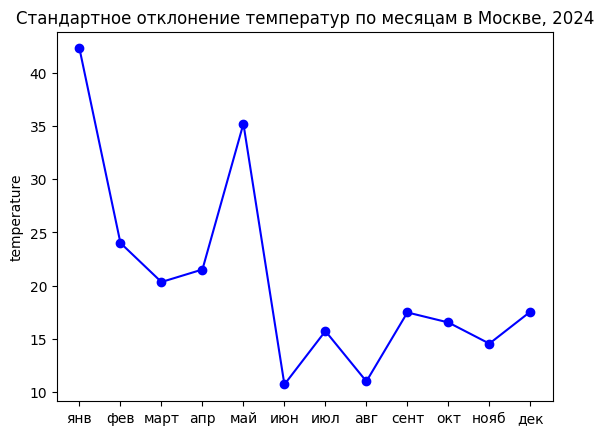

In [13]:
plt.plot([m.name for m in Month], moscow_graph_list, color='blue', marker='o', linestyle="solid")
plt.title("Стандартное отклонение температур по месяцам в Москве, 2024")
plt.ylabel("temperature")
plt.show()

### Считаем величины для Анадыря

In [14]:
anadyr_data = ExtractMonthsFromCSV('anadyr_data.csv')

In [15]:
anadyr = WeatherReportPerYear('2024')
for m in anadyr_data:
    anadyr.AddListToMonth(Month(m), anadyr_data[m])
#moscow.AddListToMonth(Month.январь, [])
anadyr_graph_list = anadyr.AllStandartDeviation()
print( anadyr_graph_list )

[51.591000642848726, 28.22542835939501, 24.891518105794816, 35.270386162529526, 18.484180439832283, 14.67069145449123, 16.72618837944438, 10.295739952639265, 13.452868537905589, 25.887376179770275, 30.096184740279327, 52.59170724710963]


Строим график

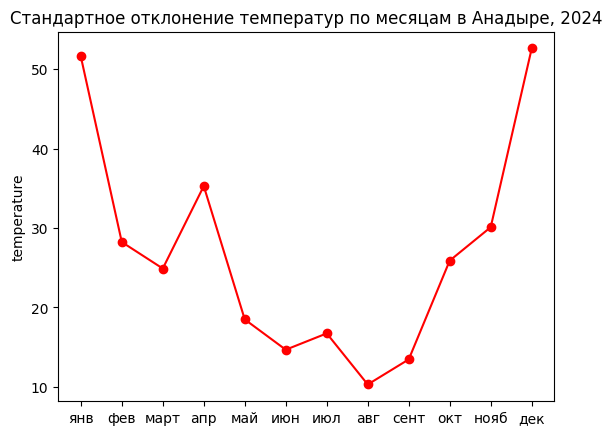

In [17]:
plt.plot([m.name for m in Month], anadyr_graph_list, color='red', marker='o', linestyle="solid")
plt.title("Стандартное отклонение температур по месяцам в Анадыре, 2024")
plt.ylabel("temperature")
plt.show()

# 1.5.2: Диаграмма населения стран мира 2000, 2010, 2020
> По данным [worldometer](https://www.worldometers.info/)

> Вроде бы worldometer не предоставляет историю данных по странам (только текущий год или весь мир в заданный год),
> так что обращаемся к World Blank API: https://api.worldbank.org/v2/

In [42]:
import requests
import json

Превращаем человеческий ввод страны в код для api

In [68]:
# КОД страны и список псевдонимов для ввода 
# [полное название..., сокращения ..., произвольное название ...]
countries = {
    'USA':['united states', 'usa', 'us', 'amerika', 'trump'],
    'CHN':['china', 'chn', 'kitay', 'xaomi'],
    'IND':['india', 'ind', 'holy cow'],
    'RUS':['russia', 'rus', 'rf', 'ussr', 'vodka'],
    'JPN':['japan', 'jpn', 'anime'],
    'DEU':['germany', 'deu', 'german', 'deuch', 'kaput'],
    'GBR':['united kingdom', 'england', 'britan', 'eng', 'uk', 'gbr', 'tea'],
    'FRA':['france', 'fra', 'fr', 'freedurov'],
    'BRA':['brazil', 'bra', 'brazilia'],
    'ITA':['italy', 'ita', 'rome', 'spqr', 'pizza'],
    'CAN':['canada', 'can', 'syrup', 'maple'],
    'AUS':['australia', 'aus', 'kenguru', 'perry', 'dinnerbone']
}

def ValidateCountry(country : str) -> str:
    country = country.lower()
    code = None
    for c in countries:
        if country in countries[c]: 
            code = c
            break
    if not code: code = country
    return code


Получаем данные

In [48]:
def GetPopulation(country: str, year: int) -> int:
    code = ValidateCountry(country)
    try:
        url = f"https://api.worldbank.org/v2/country/{code}/indicator/SP.POP.TOTL"
        params = {
            'format': 'json',
            'date': f"{year}:{year}",
            'per_page': 1
        }
        response = requests.get(url, params=params)
        data = response.json()
        # Проверяем что ответ корректный перед извлечением данных
        if len(data) > 1 and data[1] and  isinstance(data[1], list) and len(data[1]):
                # Достаём значение популяции
                return data[1][0]['value']
        print(f'[!] Пришёл некорректный ответ по запросу: {url}')
    except Exception as err:
        print(f'[!] Ошибка при обращении к API Worldbank: {err}')

Тест

In [52]:
print( GetPopulation("rus", 2010) )

142849468


Получаем 5 стран от пользователя и заполняем данные

In [71]:
# Название страны : год : популяция
data = {}

years = [2000, 2010, 2020]

print(f"Введите 5 стран чтобы получить графики за года: {years}")
print("================")
print("""
[i] Для некоторых стран доступны альтернативные названия. 
    Если страны нет в списке, введите её код (три заглавные буквы латиницы)""")
# Отображаем список полных названий стран
print("[i]", [countries[country][0] for country in countries])
for i in range(5):
    key = input(f"Страна {i+1}:")
    # Вносим полное имя страны, годы и численность населения в структуру
    correct = ValidateCountry(key)
    data[ countries[correct][0] ] = {}
    for year in years:
        data[ countries[correct][0] ][year] = GetPopulation(key, year)
# Маркер что всё обработалось и можно строить график
print("================") 

Введите 5 стран чтобы получить графики за года: [2000, 2010, 2020]

[i] Для некоторых стран доступны альтернативные названия. 
    Если страны нет в списке, введите её код (три заглавные буквы латиницы)
[i] ['united states', 'china', 'india', 'russia', 'japan', 'germany', 'united kingdom', 'france', 'brazil', 'italy', 'canada', 'australia']


Страна 1: rus
Страна 2: usa
Страна 3: eng
Страна 4: fr
Страна 5: anime


И наконец, строим диаграммы

In [60]:
from matplotlib import pyplot as plt
#print(data)

[146596869, 282162411, 58892514, 60918661, 126843000]


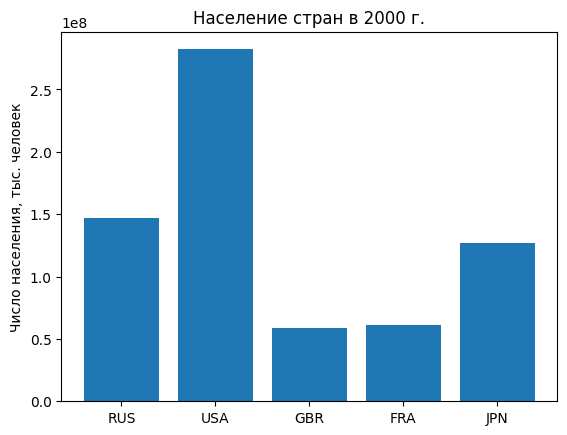

[142849468, 309378227, 62766365, 65026211, 128070000]


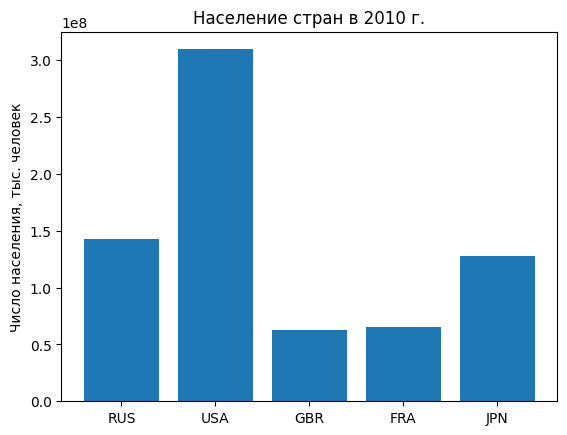

[145245148, 331577720, 66744000, 67601110, 126261000]


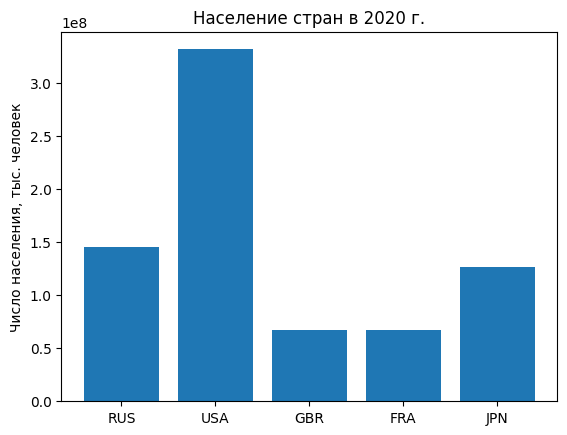

In [75]:
# Напоминание по структуре: страна > года > население
# => data[country] - список годов
"""
# График для каждой страны по годам
for country in data:
    # Подписи снизу со смещением для отображения по центру
    positions = [y+0.1 for y in range( len(data[country]) )]
    #display_years = list(data[country].keys())
    display_populations = [ data[country][y] for y in data[country] ]
    print(display_populations)
    plt.bar(positions, display_populations)
    #plt.bar(display_years, display_populations)
    plt.ylabel("Число населения, человек")
    plt.title(f"Население {country}")
    plt.xticks([y+0.1 for y in range( len(data[country]) ) ], data[country])
    #plt.xticks(positions, data[country].keys())
    plt.show()
"""
# График для каждого года по странам
for year in years:
    # Смещение для подписей стран
    positions = [i+0.1 for i in range( len(data.keys()) )]
    # Популяция по странам
    display_populations = []
    for c in data.keys(): display_populations.append(data[c][year])
    print(display_populations)
    #display_populations = [ data[c][year] for с in list(data.keys()) ]
    plt.bar(positions, display_populations)
    plt.ylabel("Число населения, тыс. человек")
    plt.title(f"Население стран в {year} г.")
    plt.xticks([i+0.1 for i in range( len(data.keys()) ) ], [ ValidateCountry(c) for c in data.keys()])
    plt.show()